In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import glob
from scipy.fft import rfftfreq, rfft, irfft
from grand import ECEF, Geodetic, GRANDCS, LTP
from scipy.optimize import minimize_scalar
from scipy.optimize import curve_fit
import os 
import datetime
plt.style.use("/home/olivier/GRAND/soft/l3.mplstyle")

data_dir = "/home/olivier/GRAND/GP300/ana/GP13/aug2024/"

Welcome to JupyROOT 6.26/10


Fields in npz file:
du_id
du_coord
traces
zenith
azimuth
event_id


(0.0, 100.0)

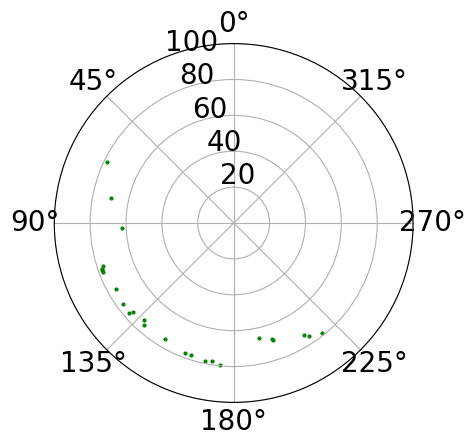

In [2]:
a = np.load(data_dir+"GP13_UD_240616_240708_EField_rec.npz")
print("Fields in npz file:")
for k in a.files:
    print(k)
    
zen = a['zenith']
az = a['azimuth']

plt.polar()
plt.scatter(az * np.pi / 180, zen, marker='o', ls='-', s=1, c='g')
plt.gca().set_theta_zero_location('N', offset=0)
plt.ylim([0,100])


25 coincs:
[ 2260.  6272.  7336. 44371. 45499. 45502. 45503. 45504. 45966. 51121.
 51122. 51327. 56763. 56764. 56770. 56771. 56773. 59476. 67544. 67548.
 74251. 77785. 87100. 91849. 91954.]
Event 2260.0 mult = 6
[1031 1029 1085 1075 1013 1020]


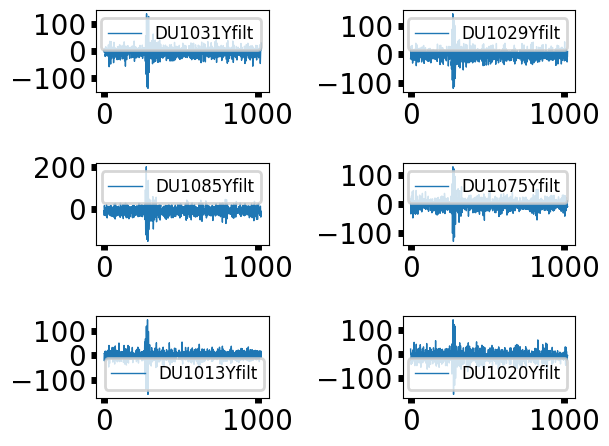

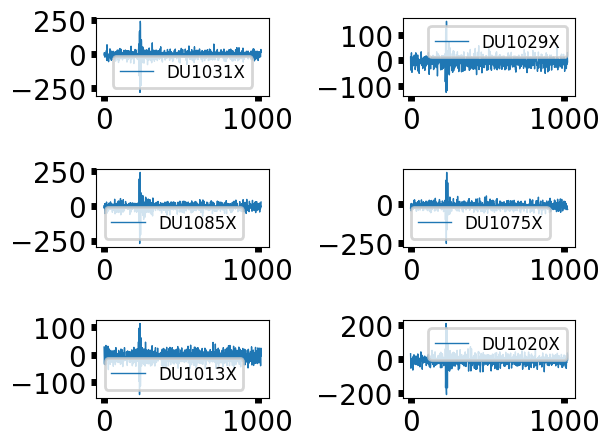

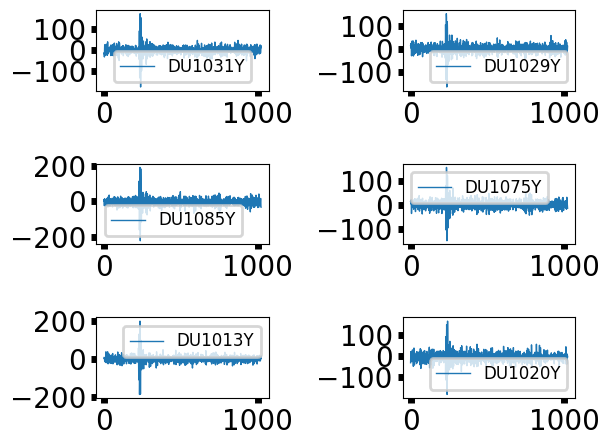

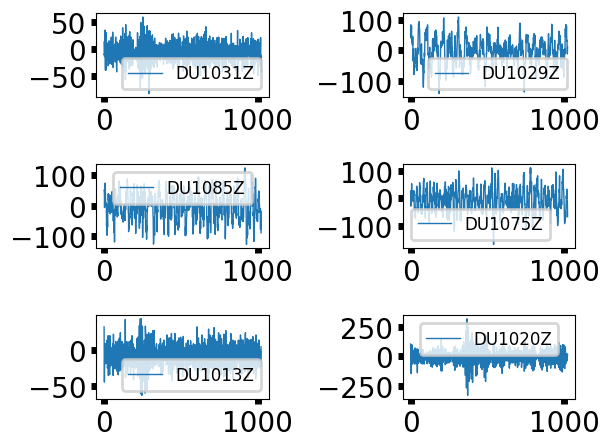

Event 6272.0 mult = 7
[1071 1017 1085 1029 1075 1019 1020]
Event 7336.0 mult = 6
[1029 1085 1075 1020 1071 1013]


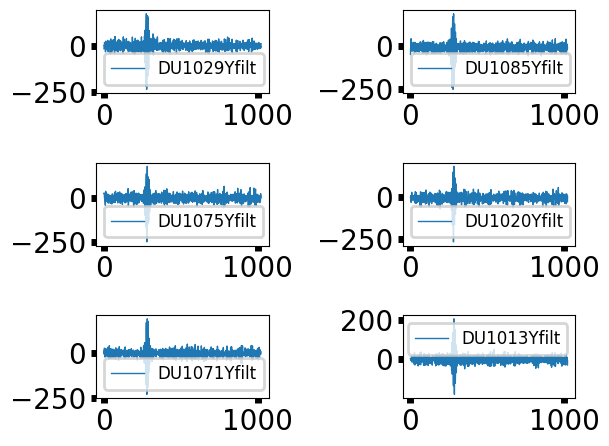

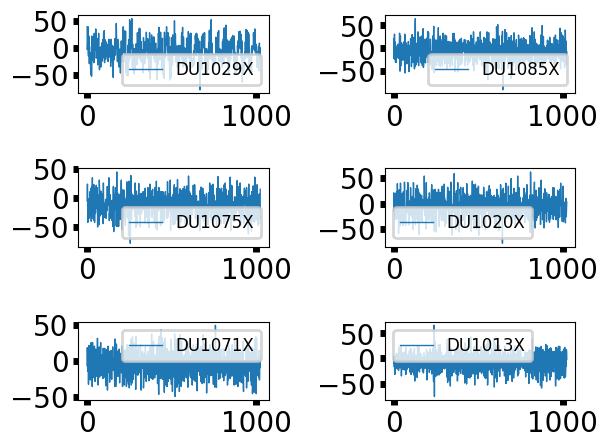

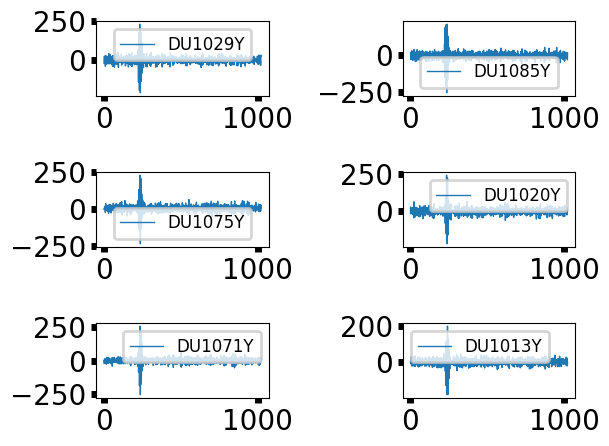

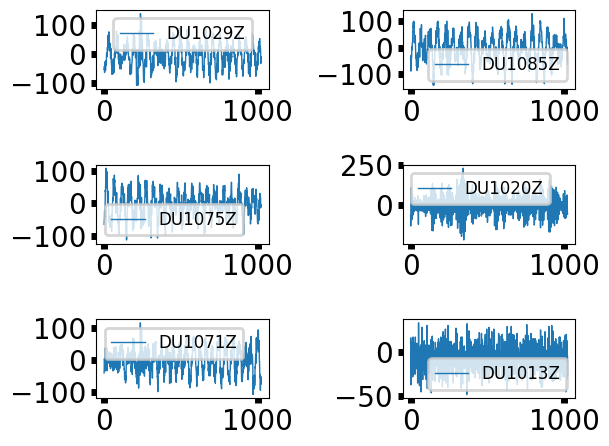

Event 44371.0 mult = 6
[1071 1031 1019 1075 1029 1020]


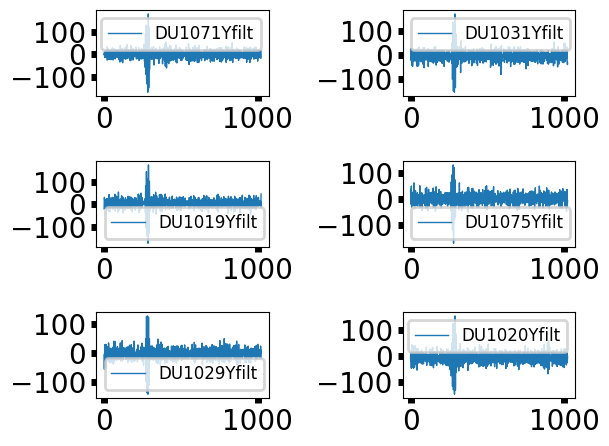

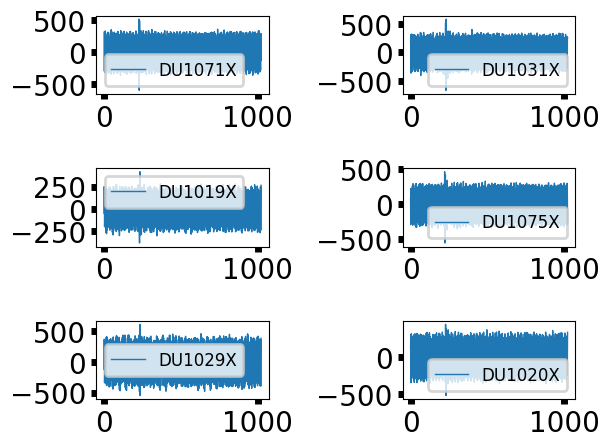

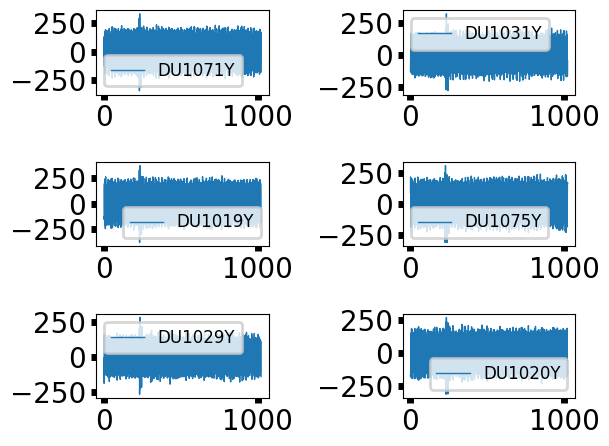

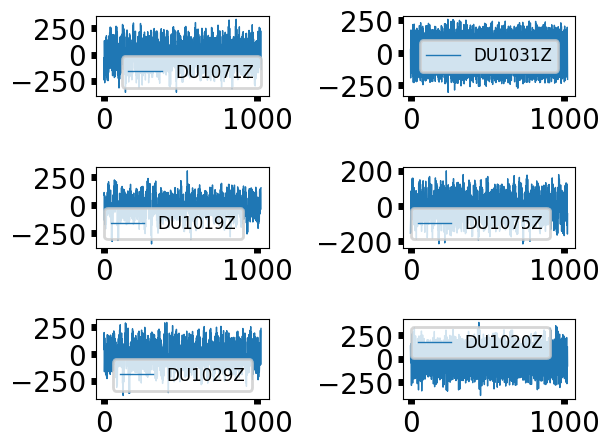

Event 45499.0 mult = 6
[1029 1031 1085 1032 1075 1013]


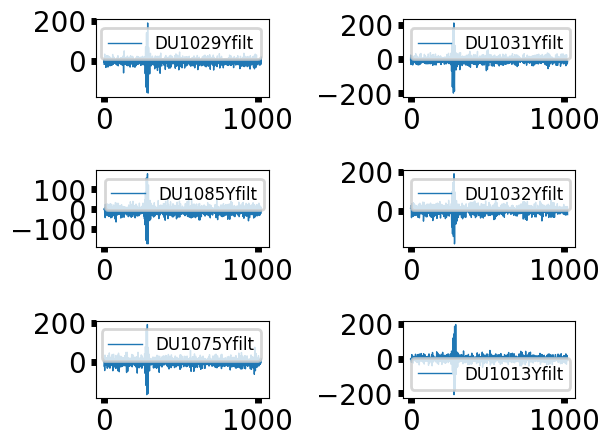

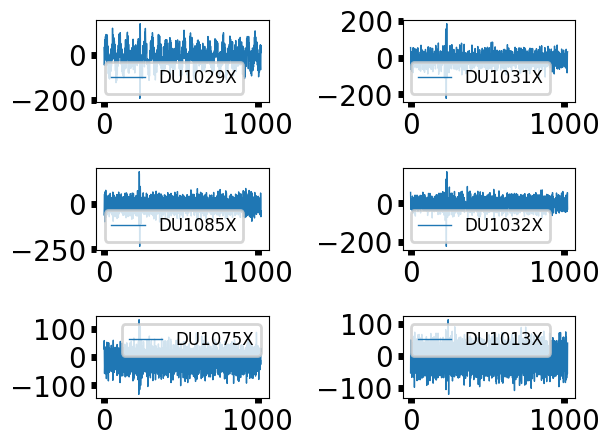

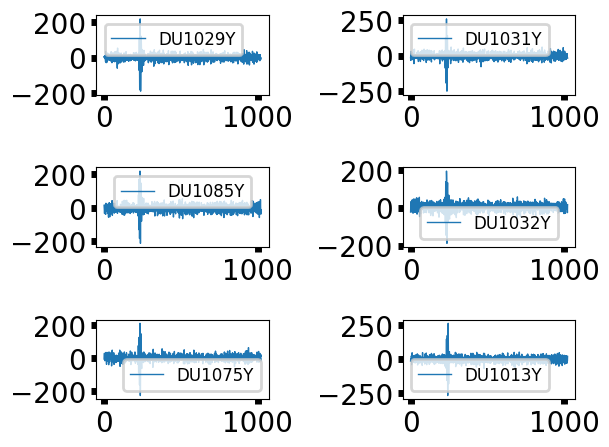

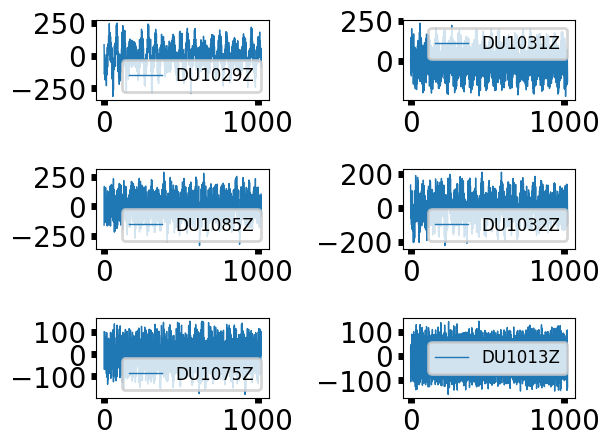

Event 45502.0 mult = 6
[1085 1031 1071 1019 1013 1020]


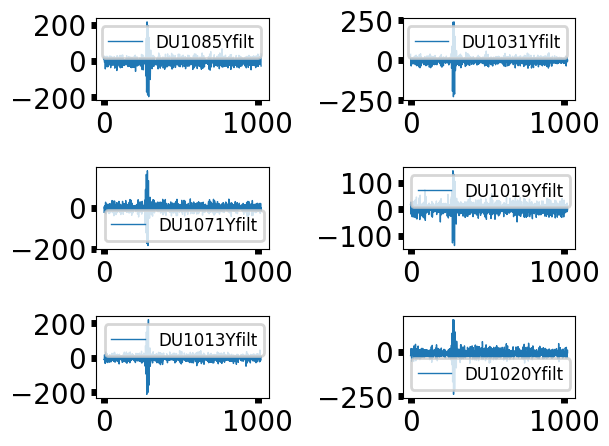

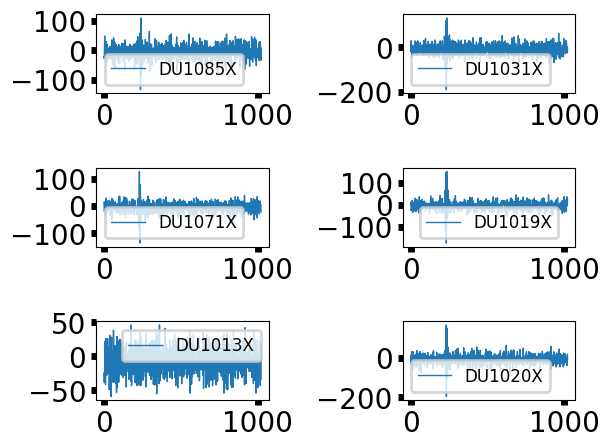

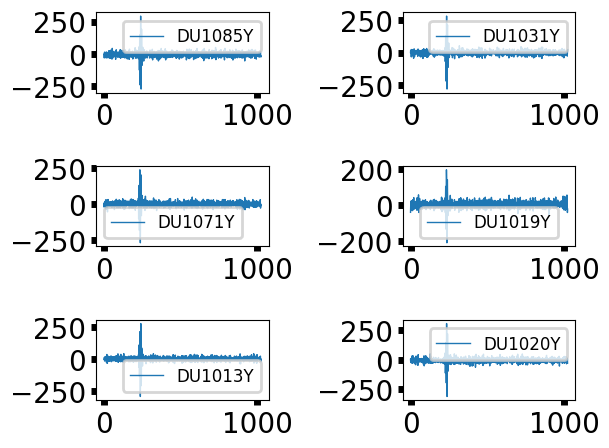

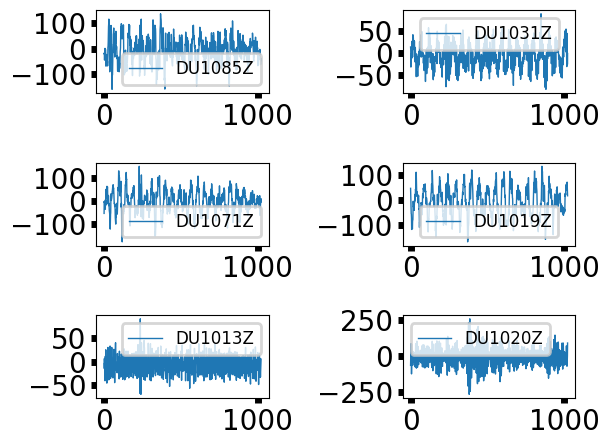

Event 45503.0 mult = 7
[1029 1085 1032 1031 1075 1019 1020]
Event 45504.0 mult = 6
[1029 1032 1031 1075 1020 1013]


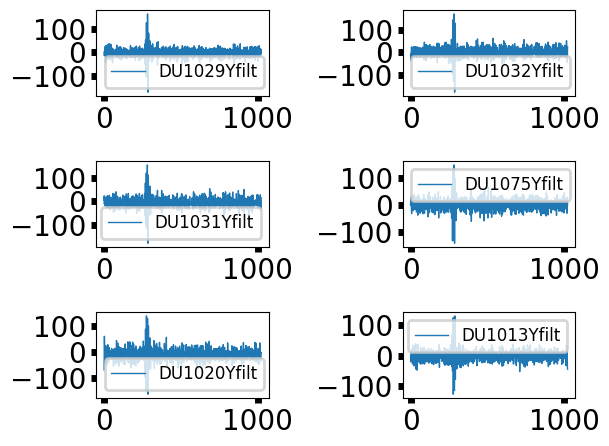

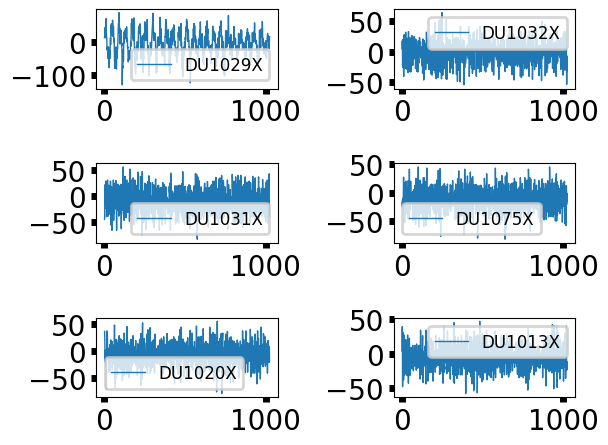

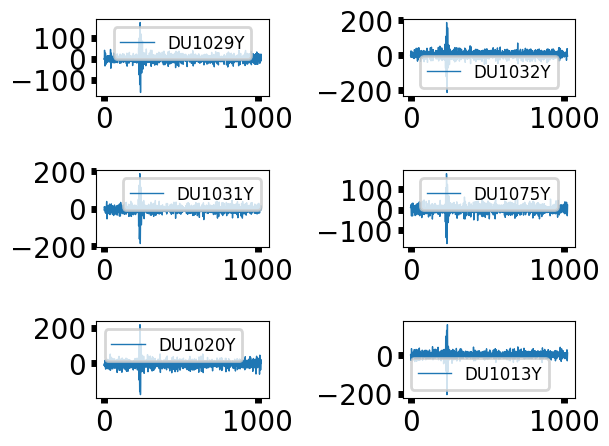

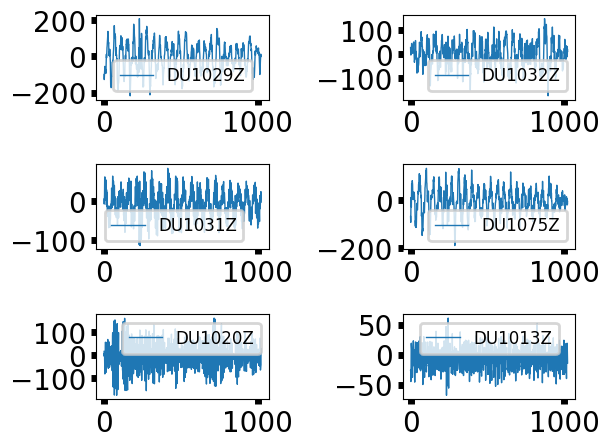

Event 45966.0 mult = 7
[1029 1032 1085 1020 1031 1019 1013]
Event 51121.0 mult = 6
[1029 1020 1085 1075 1031 1071]


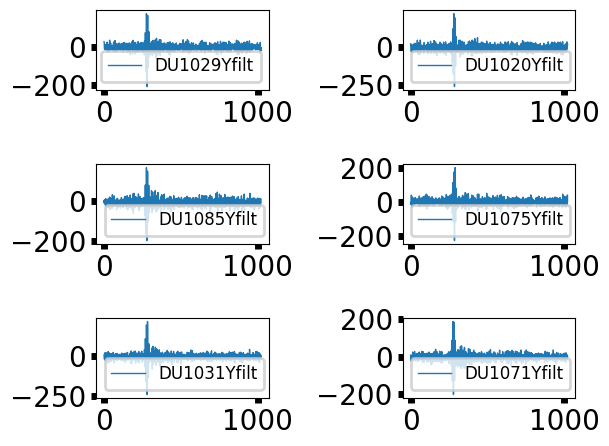

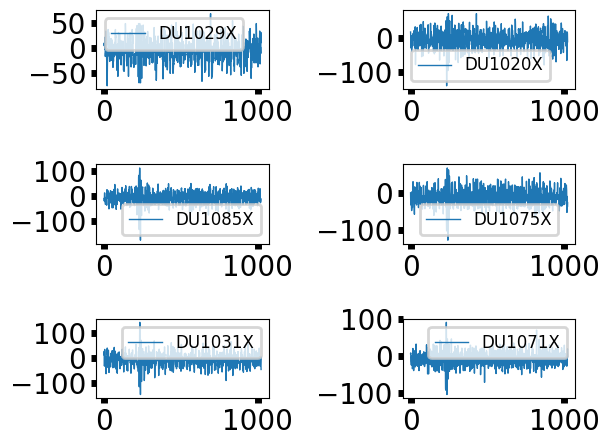

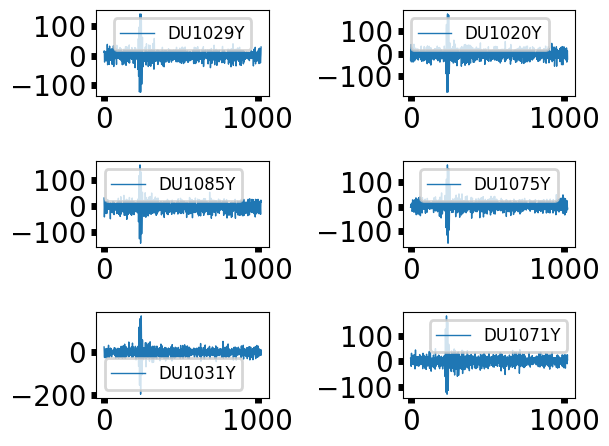

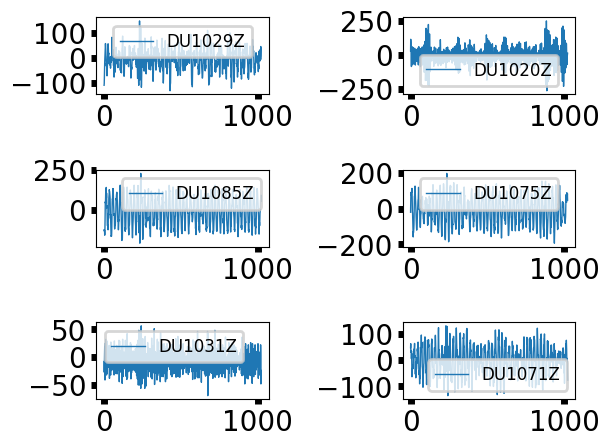

Event 51122.0 mult = 6
[1029 1032 1020 1075 1013 1071]


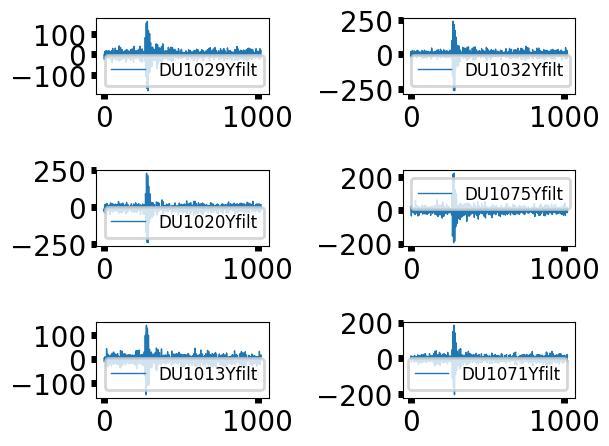

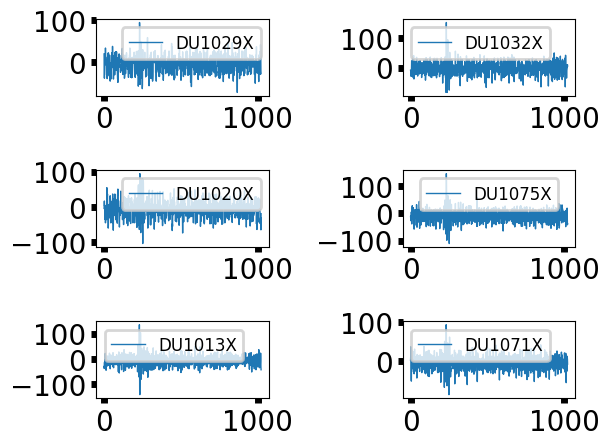

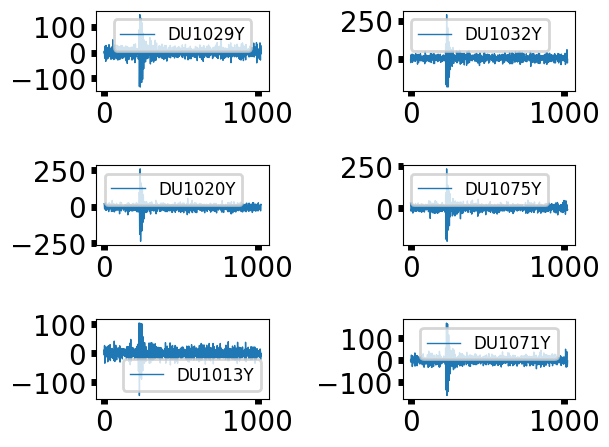

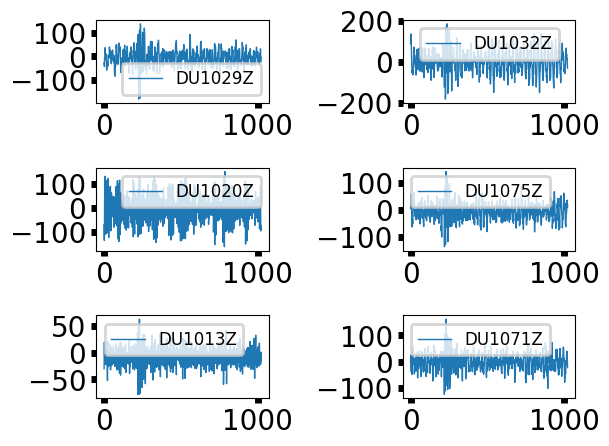

Event 51327.0 mult = 6
[1029 1020 1085 1075 1019 1071]


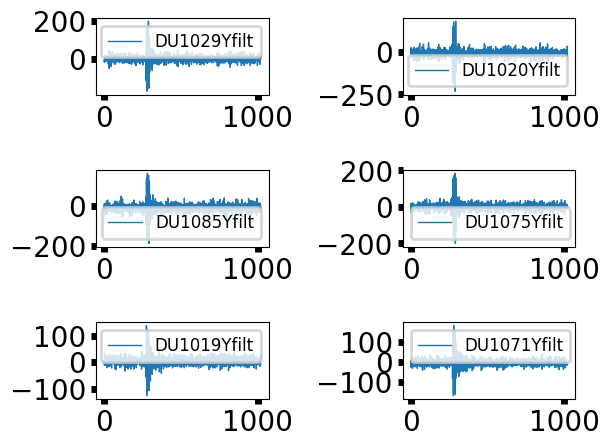

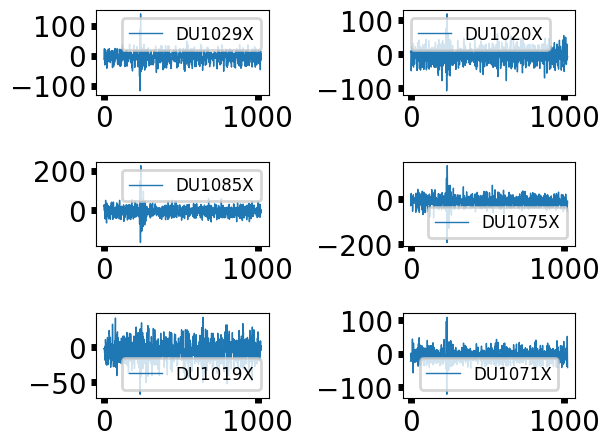

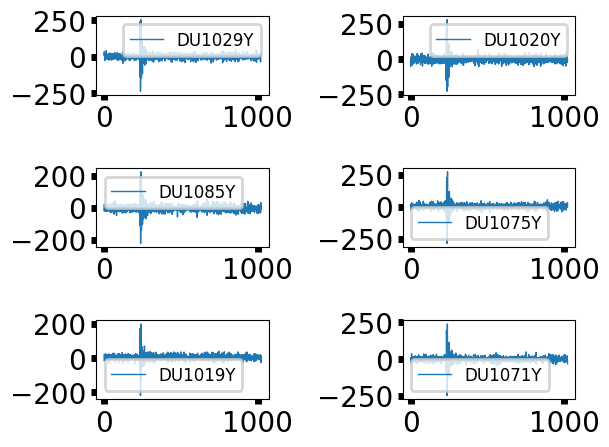

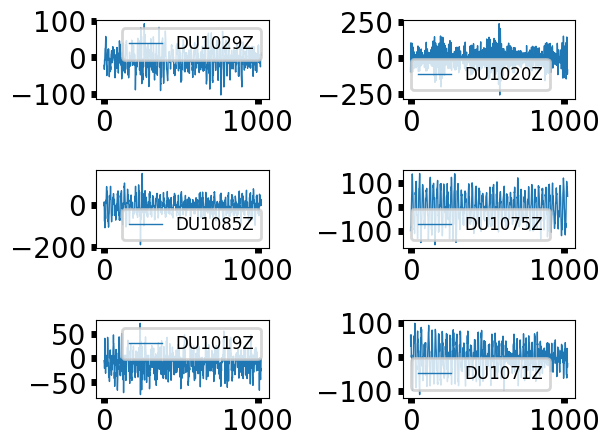

Event 56763.0 mult = 7
[1029 1031 1032 1075 1071 1019 1020]
Event 56764.0 mult = 8
[1029 1085 1032 1075 1071 1019 1013 1020]
Event 56770.0 mult = 7
[1031 1071 1085 1029 1013 1032 1020]
Event 56771.0 mult = 6
[1071 1085 1013 1075 1032 1020]


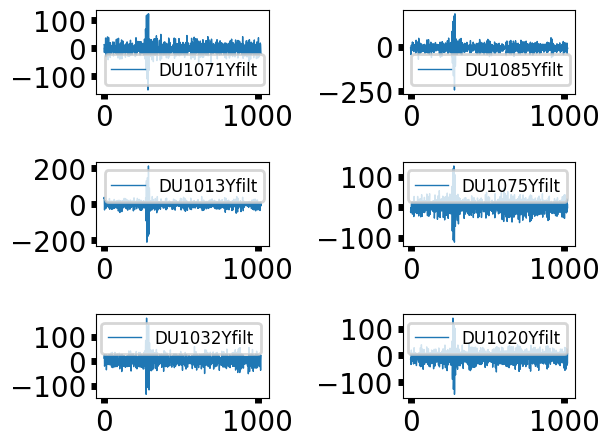

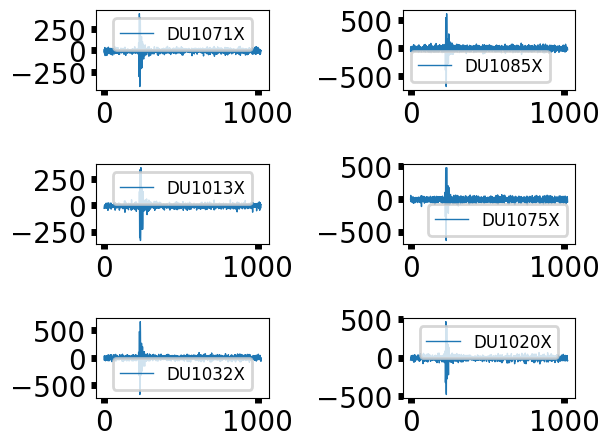

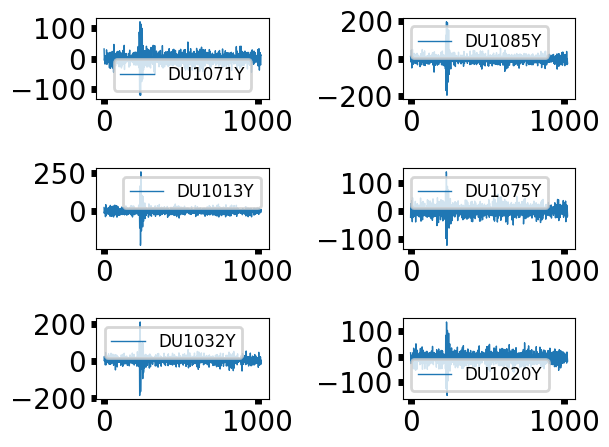

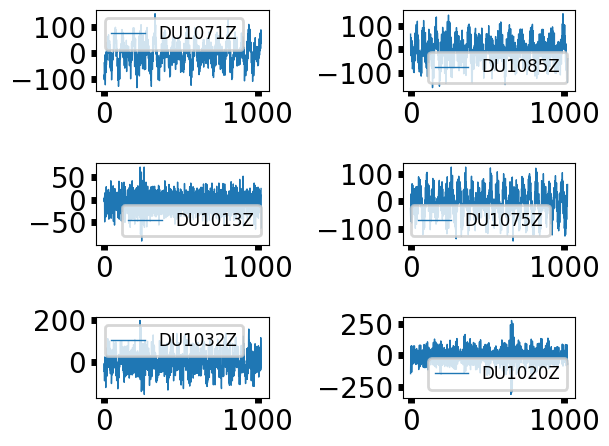

Event 56773.0 mult = 6
[1031 1029 1085 1075 1013 1020]


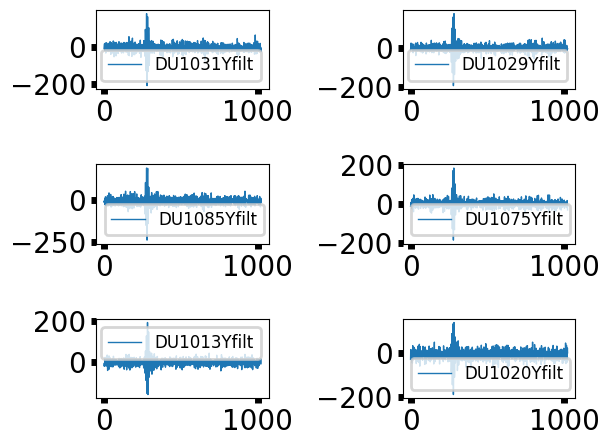

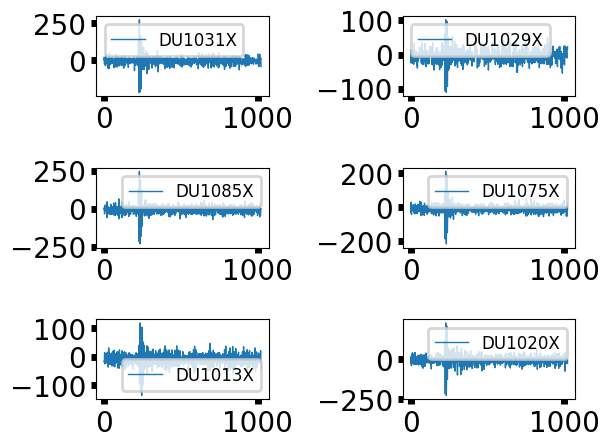

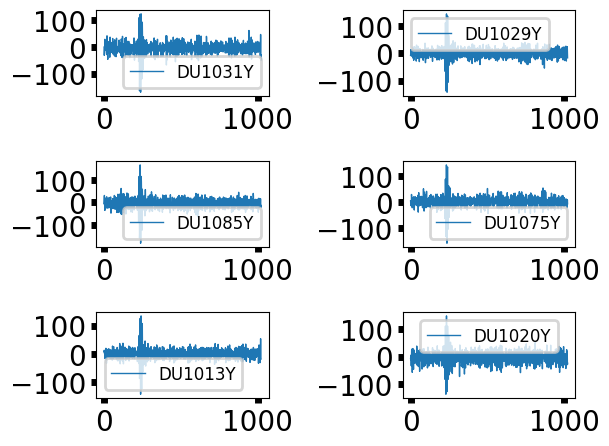

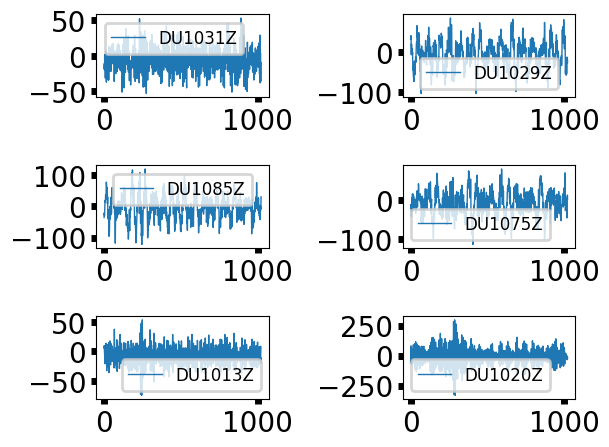

Event 59476.0 mult = 6
[1029 1032 1085 1020 1031 1071]


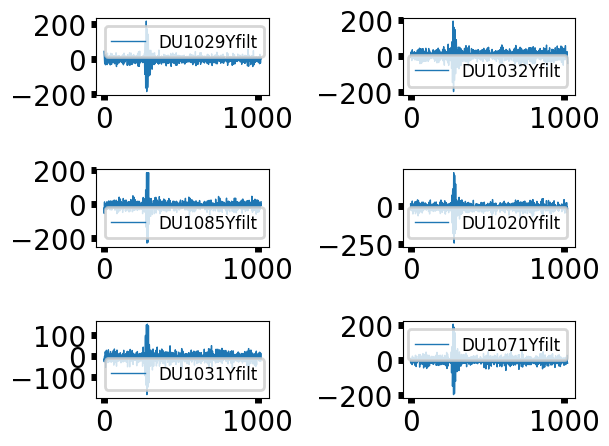

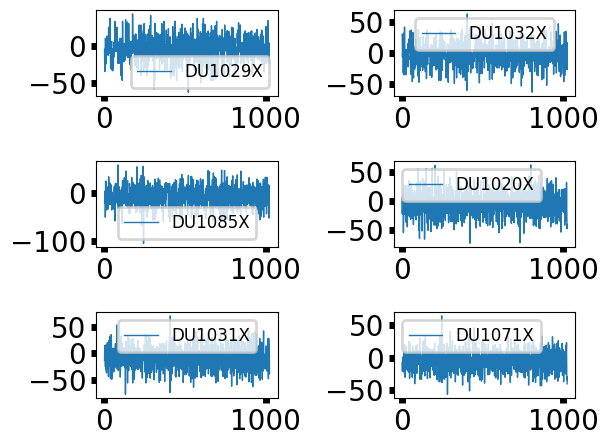

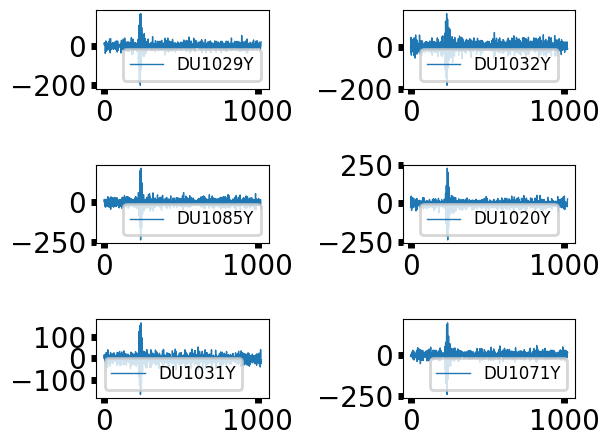

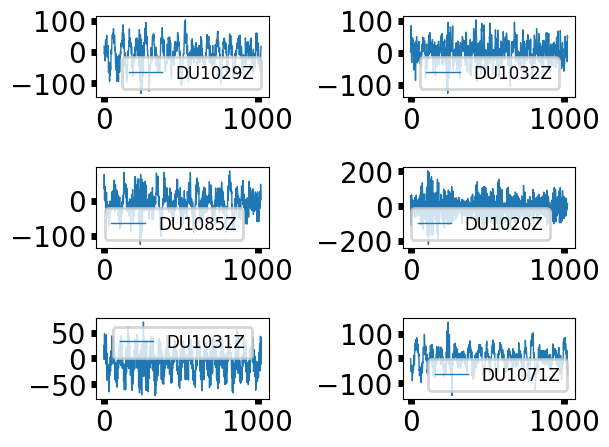

Event 67544.0 mult = 6
[1031 1071 1029 1075 1032 1020]


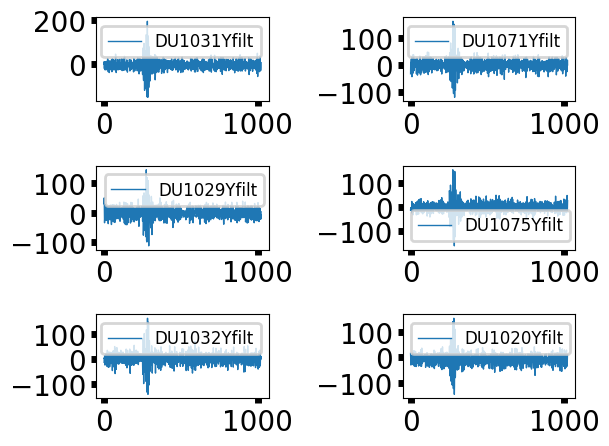

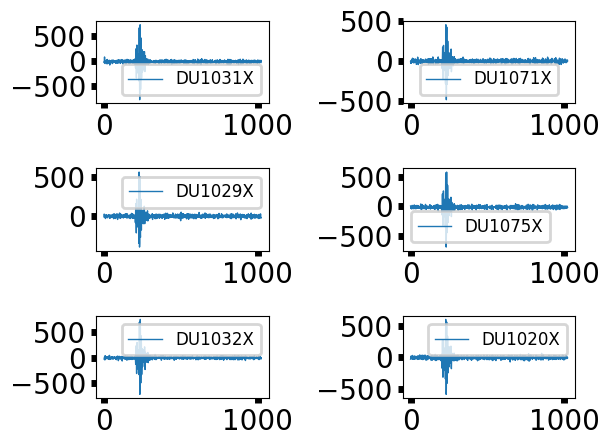

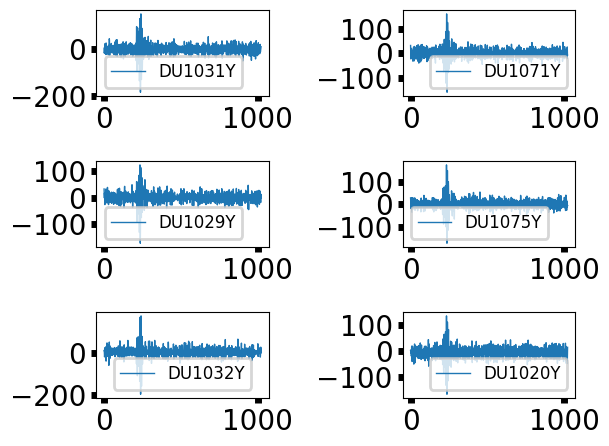

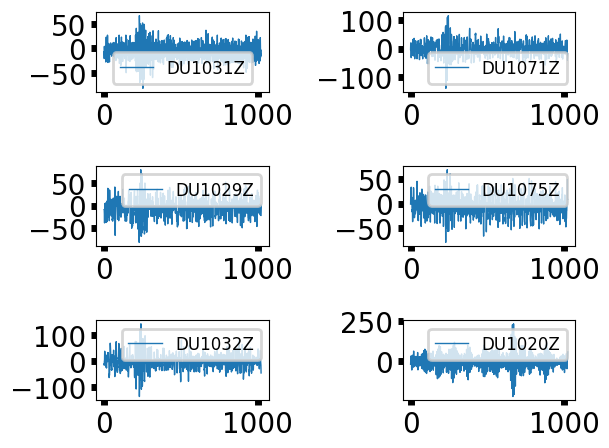

Event 67548.0 mult = 6
[1029 1031 1071 1032 1013 1020]


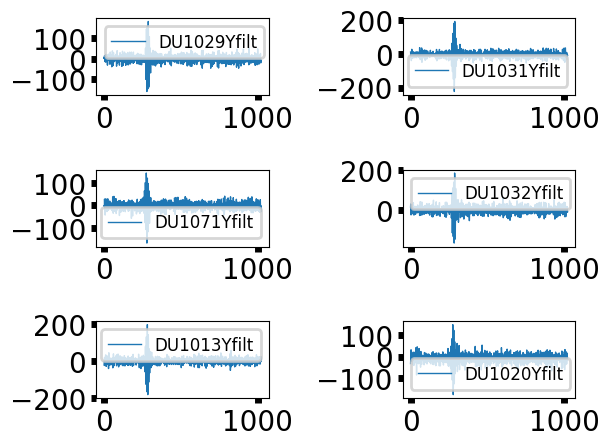

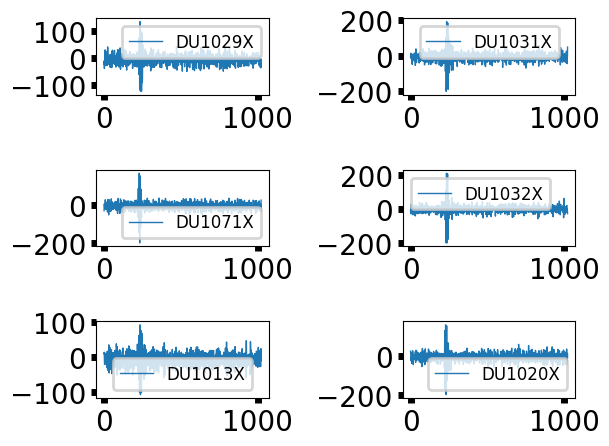

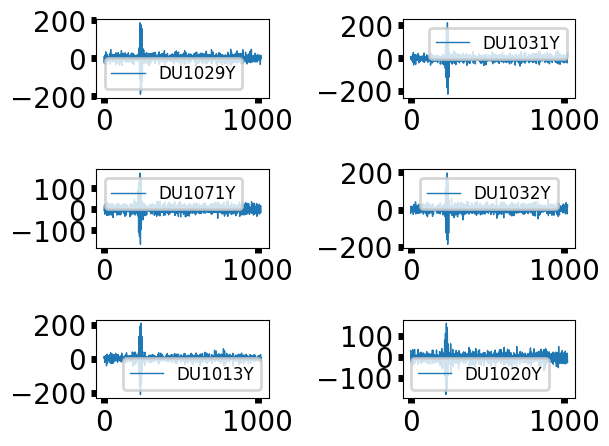

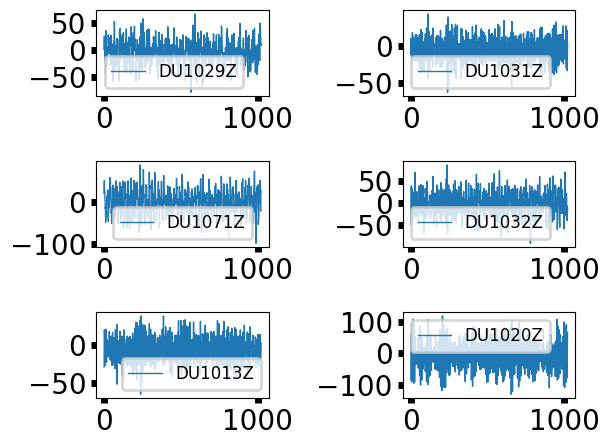

Event 74251.0 mult = 6
[1071 1031 1019 1075 1029 1020]


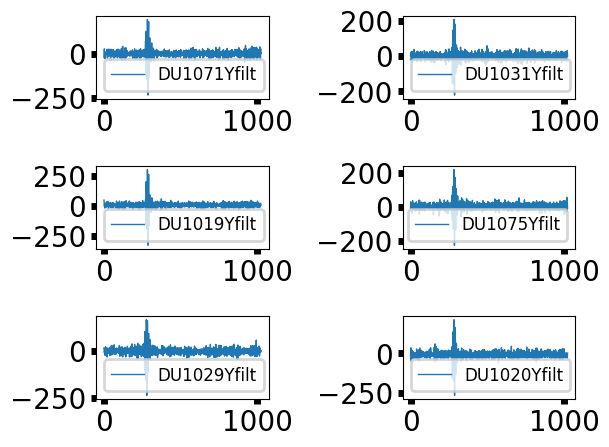

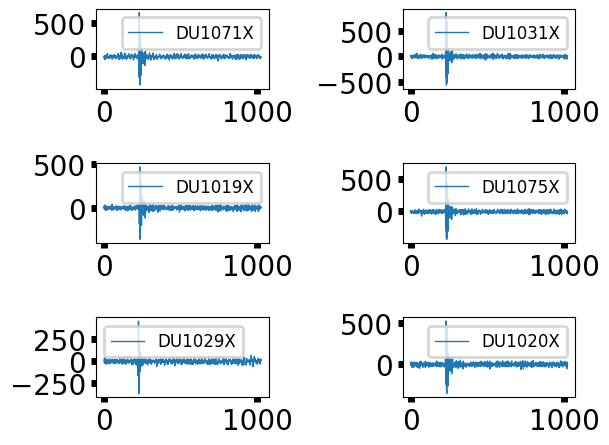

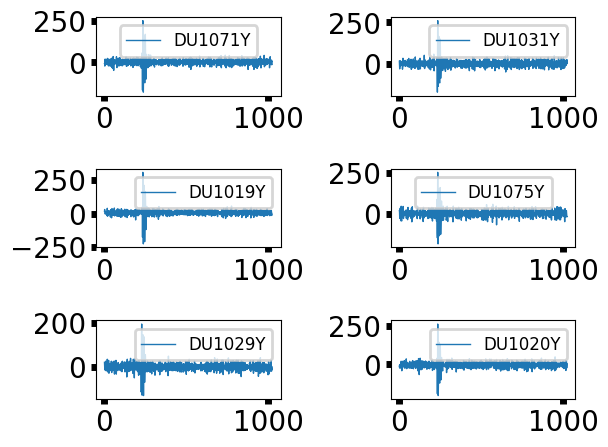

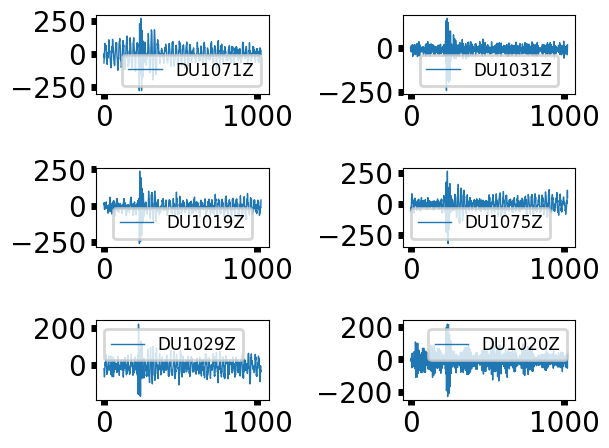

Event 77785.0 mult = 6
[1031 1071 1029 1013 1075 1020]


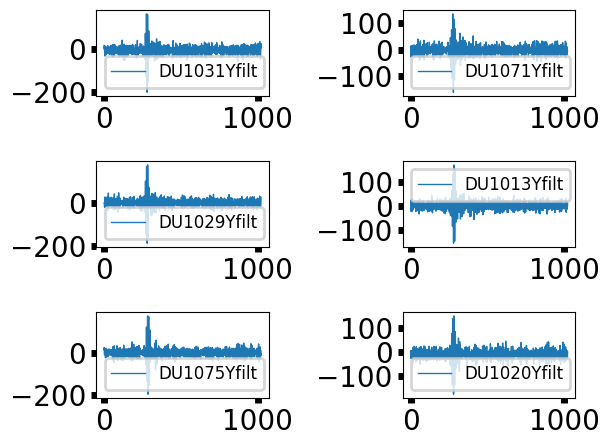

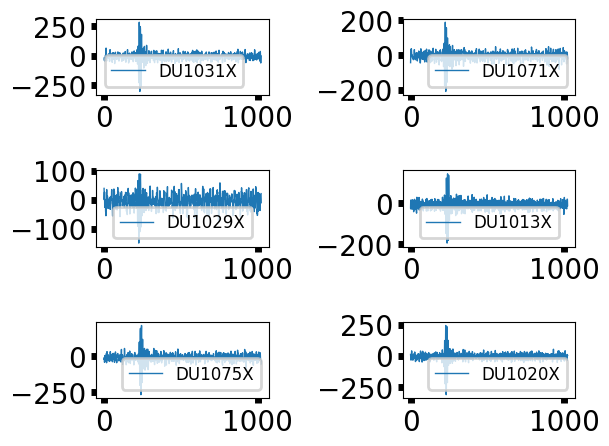

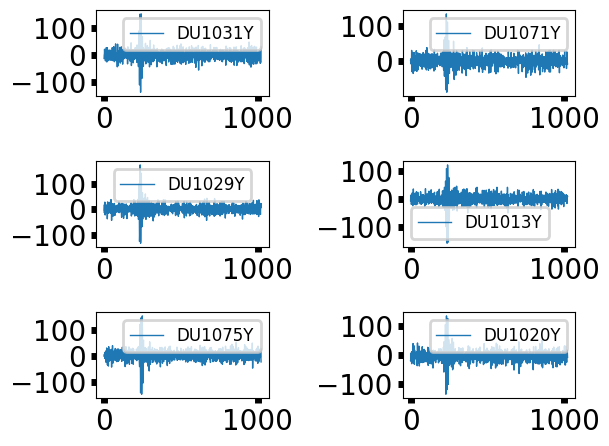

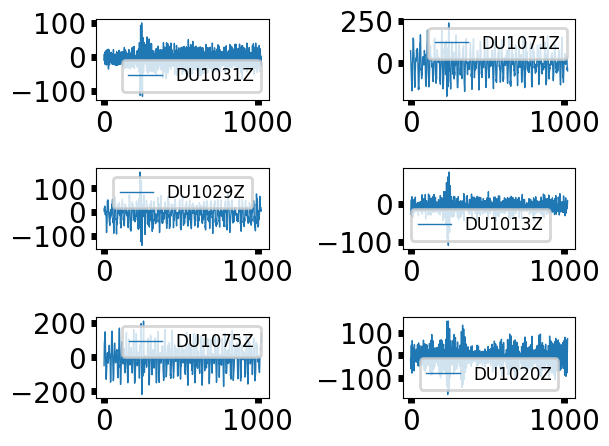

Event 87100.0 mult = 6
[1029 1031 1071 1075 1032 1020]


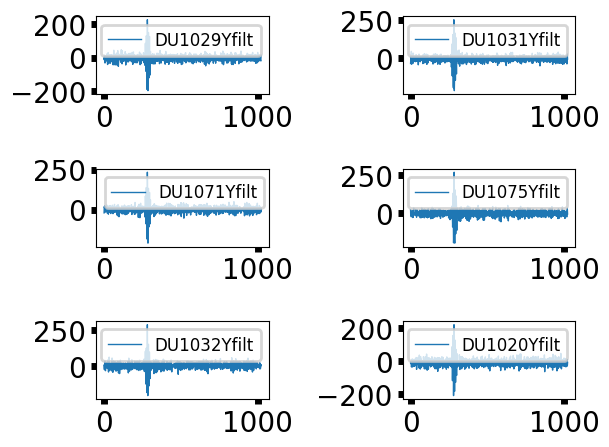

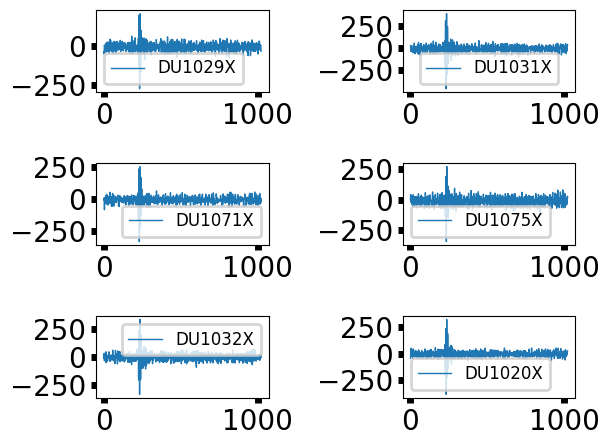

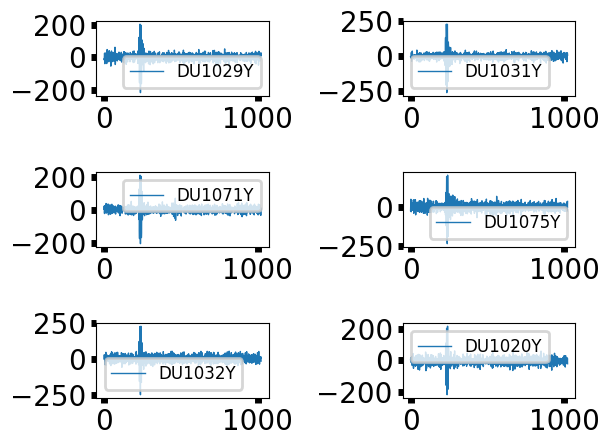

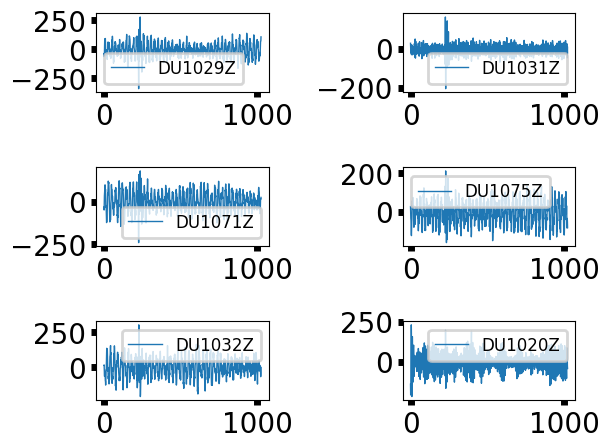

Event 91849.0 mult = 6
[1031 1029 1071 1032 1013 1020]


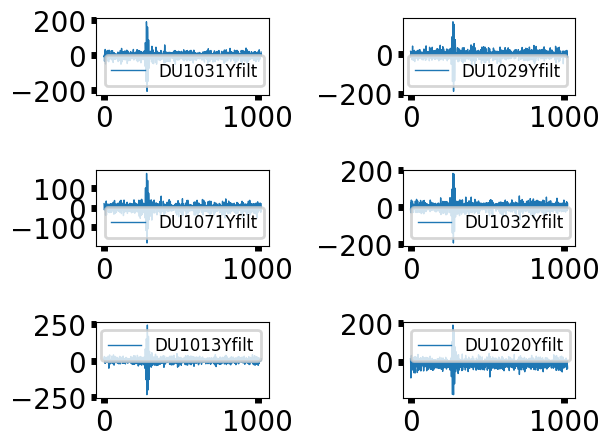

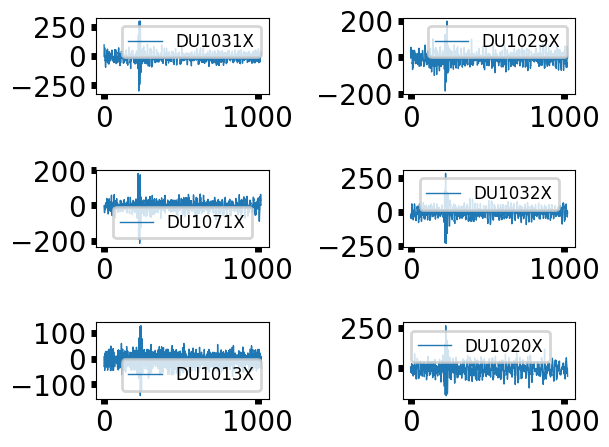

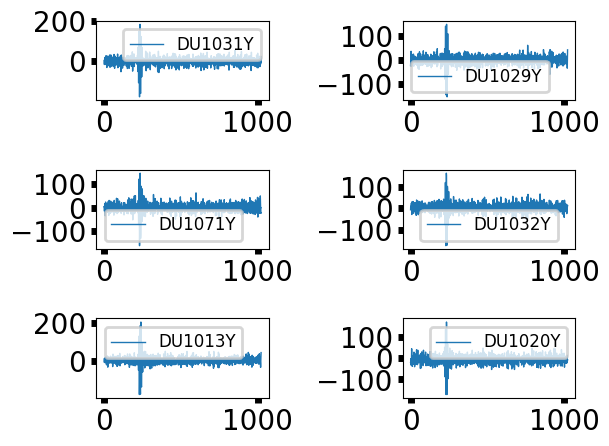

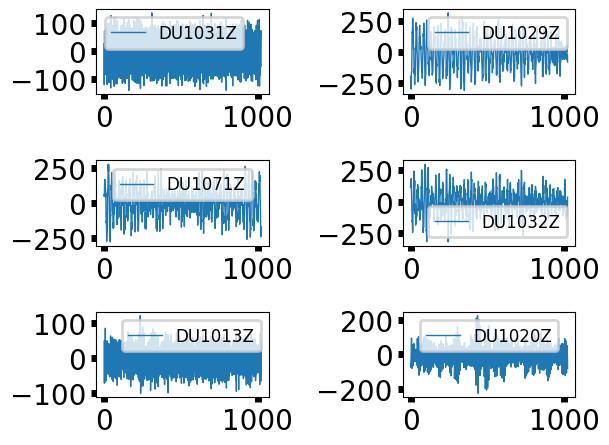

Event 91954.0 mult = 6
[1031 1071 1029 1013 1075 1032]


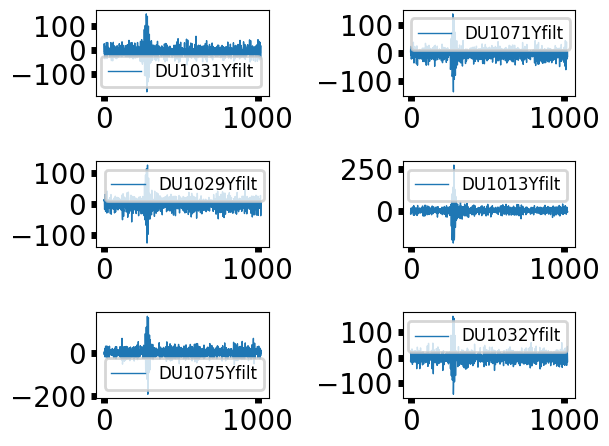

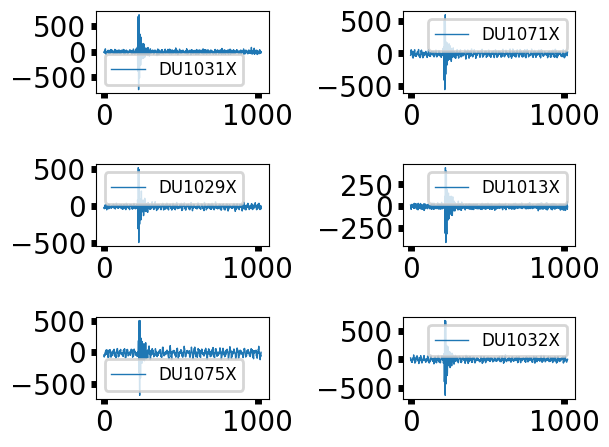

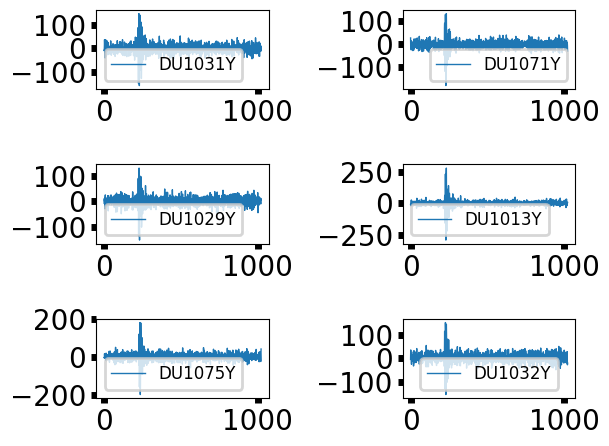

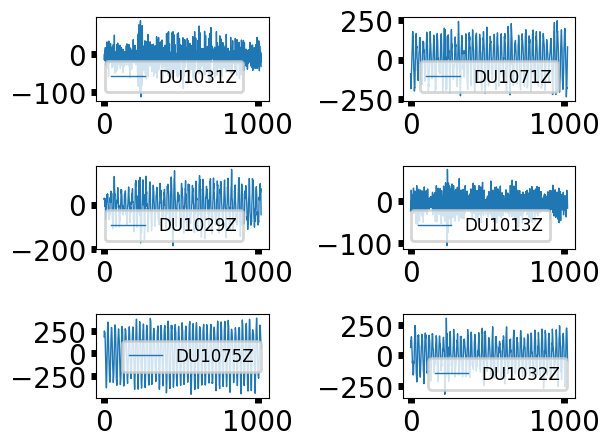

In [3]:
du_id =   np.array(a['du_id'])
event_id = np.array(a['event_id'])

traces = np.array(a['traces'])
event_id_unique, ind_unique = np.unique(event_id, return_index=True)
print(len(event_id_unique),"coincs:")
print(event_id_unique)
for i, evid in enumerate(event_id_unique):
    mask_ev = event_id == evid
    mult = sum(mask_ev)
    print("Event",evid,"mult =",mult)
    print(du_id[mask_ev])
    thisTraces = traces[mask_ev]
    thisIDs = du_id[mask_ev]
    figid = i*10
    if mult == 6:
        for j in range(mult):
          plt.figure(figid+1)
          plt.subplot(3,2,j+1)
          lab = "DU"+str(thisIDs[j])+"Yfilt"
          plt.plot(thisTraces[j,0,:],lw=1,label=lab)
          plt.legend(loc='best')
          plt.figure(figid+2)
          plt.subplot(3,2,j+1)
          lab = "DU"+str(thisIDs[j])+"X"
          plt.plot(thisTraces[j,1,:],lw=1,label=lab)
          plt.legend(loc='best')
          plt.figure(figid+3)
          plt.subplot(3,2,j+1)
          lab = "DU"+str(thisIDs[j])+"Y"
          plt.plot(thisTraces[j,2,:],lw=1,label=lab)
          plt.legend(loc='best')
          plt.figure(figid+4)
          plt.subplot(3,2,j+1)
          lab = "DU"+str(thisIDs[j])+"Z"
          plt.plot(thisTraces[j,3,:],lw=1,label=lab)
          plt.legend(loc='best')
    plt.show()
